#Test Timing
Program ini bertujuan untuk mengukur waktu yang dibutuhkan untuk machine learning di setiap masing-masing metode.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Pengukuran Waktu untuk Metode Distribusi Normal
Hasil yang didapat rata-rata 3 detik.

Accuracy percentage: 50.0
--- 3.7100813388824463 seconds ---


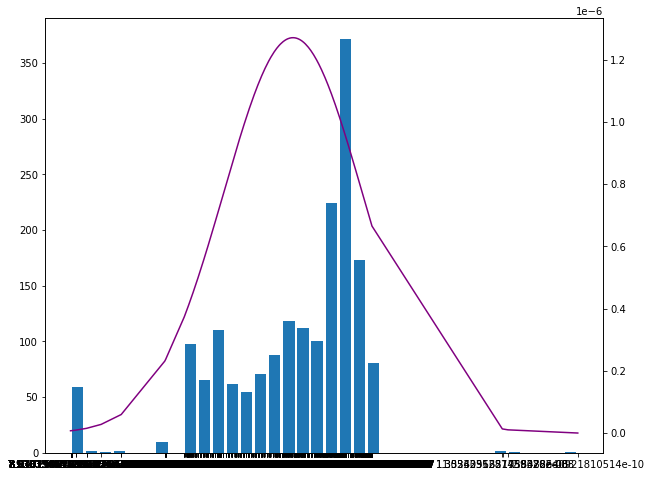

In [9]:
import time
start_time = time.time()
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

df=pd.read_csv('/content/gdrive/MyDrive/TelinData/test_anomaly2.csv',skiprows=10)
#df = df.drop(df.columns[0], axis=1)
#df = df.dropna()
df["sum"] = df.sum(axis=1)
df=df[["sum"]]
df = df.reset_index(drop=True)
raw_data = df.values
out = df.values.flatten()
out.sort()
x_axis=out**0.5
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
histo = plt.hist(x_axis,bins=36,rwidth=0.8)
plt.xticks(x_axis, norm.pdf(x_axis, mean, sd))
plt.twinx()
NormalEdge = plt.plot(x_axis, norm.pdf(x_axis, mean, sd),color='purple')
plt.xticks(x_axis, norm.pdf(x_axis, mean, sd))
lower_limit = df['sum'].mean() -3*df['sum'].std()
upper_limit = df['sum'].mean() + 3*df['sum'].std()
outlier=df[(df['sum']>upper_limit) | (df['sum']<lower_limit)]
outliers=len(outlier)
anomaly=8
print("Accuracy percentage:", 100*outliers/anomaly)


print("--- %s seconds ---" % (time.time() - start_time))

#Pengukuran Waktu untuk Metode Isolation Forest
Hasil yang didapat rata-rata 1 detik.

In [7]:
import time
start_time = time.time()
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd 
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False
df=pd.read_csv('/content/gdrive/MyDrive/TelinData/test_anomaly2.csv',skiprows=10)
df["sum"] = df.sum(axis=1)
df[['Date','sum']]
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date').resample("H").mean().reset_index()
df['hour']=df.Date.dt.hour
df['weekday']=pd.Categorical(df.Date.dt.strftime('%A'),categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
model =  IsolationForest(contamination=0.05)
model.fit(df[['sum']])
df['outliers']=pd.Series(model.predict(df[['sum']])).apply(lambda x: 'yes' if (x == -1) else 'no' )
df.query('outliers=="yes"')
fig = px.scatter(df.reset_index(), x='Date', y='sum', color='outliers', hover_data=['weekday'], title='Facebook Traffic')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()
model =  IsolationForest()
model.fit(df[['sum']])
score=model.decision_function(df[['sum']])
df['scores'] = score
df.query('scores<-0.10')
anomaly=len(df[df['outliers']=="yes"])
outliers_counter = len(df[df['scores'] < -0.10])
print("Accuracy percentage:", 100*(outliers_counter)/anomaly)

print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:286: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Accuracy percentage: 87.5
--- 0.8804082870483398 seconds ---
